# Chem 30324, Spring 2019, Homework 2
## Due: January 29, 2020

## Problem 1. Gases on a table top

In class we derived the properties of a 3-dimensional gas from the Boltzmann distribution and three postulates, and you studied a 1-dimensional gas in Homework 1. Suppose you were interested instead in a 2-dimensional gas, for example gas molecules able to freely skate around on a surface but that couldn’t escape the surface.

### 1. Derive the Maxwell-Boltzman speed distribution for a 2-dimensional gas. (*Hint*: Think polar coordinates.)

For a 1-dimensional gas,
$$P=(\frac{m}{2\pi kT})^{1/2}\exp(\frac{-mv^2}{2kT})$$
For a 3-dimensional gas,
$$P=4\pi v^2(\frac{m}{2\pi kT})^{3/2}\exp(\frac{-mv^2}{2kT})$$
Where $4\pi v^2$ is the number of directions (area of sphere).

In a 2-dimensional space, the number of directions is $2\pi v$ (circumference of circle).

Therefore,
$$P=2\pi v(\frac{m}{2\pi kT})^{2/2}\exp(\frac{-mv^2}{2kT})$$
$$=(\frac{m v}{k T})\exp(\frac{-mv^2}{2kT})$$ for a 2-dimensional space.

### 2. Plot this 2-dimensional speed distribution for O$_2$ molecules at 200, 400 and 600 K.

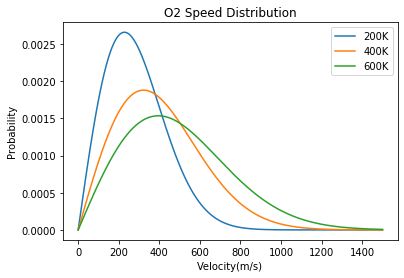

In [0]:
import numpy as np
import matplotlib.pyplot as plt

m = 32/1000/(6.022*10**23) #mass of O2 (kg/molecule)
k = 1.38064852*10**-23 # Boltzmann Constant (m^2 kg s^-2 K^-1)
v = np.linspace(0,1500,1000) #velocity (m/s)

for T in [200,400,600]:
  P = (m*v/k/T)*np.exp(-m*v**2/(2*k*T)) #Maxwell-Boltzman speed distribution for a 2-D gas
  plt.plot(v,P, label = '{0}K'.format(T))

plt.xlabel('Velocity(m/s)')
plt.ylabel('Probability')
plt.legend(loc='best')
plt.title('O2 Speed Distribution')
plt.show()



### 3. Calculate the mean (expected value) of the speed of a 2-dimensional gas of molecules. How does your answer compare to a 3-dimensional gas?

In [0]:
from sympy import *

T = Symbol('T',positive=True)
k = Symbol('k',positive=True)
m = Symbol('m',positive=True)
v = Symbol('v',positive=True)

#2D Gas
eqn2d = (2*pi*v)*(m/2/pi/k/T)*exp(-m*v**2/2/k/T)
vbar2top = integrate(eqn2d*(v),(v,0,oo))
vbar2bot = integrate(eqn2d,(v,0,oo))
pprint(vbar2top/vbar2bot)
pprint(vbar2top)

#1D Gas
eqn1d = (m/2/pi/k/T)**(0.5)*exp(-m*v**2/2/k/T)
vbar1top = integrate(eqn1d*(v),(v,0,oo))
vbar1bot = integrate(eqn1d,(v,0,oo))
pprint(vbar1top/vbar1bot)

#3D Gas
eqn3d = (4*pi*v**2)*(m/2/pi/k/T)**(1.5)*exp(-m*v**2/2/k/T)
vbar3top = integrate(eqn3d*(v),(v,0,oo))
vbar3bot = integrate(eqn3d,(v,0,oo))
pprint(vbar3top/vbar3bot)

√2⋅√π⋅√T⋅√k
───────────
    2⋅√m   
√2⋅√π⋅√T⋅√k
───────────
    2⋅√m   
        -0.5  0.5  0.5  -0.5
1.0⋅√2⋅π    ⋅T   ⋅k   ⋅m    
        -0.5  0.5  0.5  -0.5
2.0⋅√2⋅π    ⋅T   ⋅k   ⋅m    


### 4. Calculate the mean kinetic energy of a 2-dimensional gas. How does your answer compare to a one and 3-dimensional gas?

In [0]:
from sympy import *

T = Symbol('T',positive=True)
k = Symbol('k',positive=True)
m = Symbol('m',positive=True)
v = Symbol('v')

#2D Gas
eqn2d = (2*pi*v)*(m/2/pi/k/T)*exp(-m*v**2/2/k/T)
vbar2top = integrate(eqn2d*(v**2/2),(v,0,oo))
vbar2bot = integrate(eqn2d,(v,0,oo))
pprint(vbar2top/vbar2bot)

#1D Gas
eqn1d = (m/2/pi/k/T)**(0.5)*exp(-m*v**2/2/k/T)
vbar1top = integrate(eqn1d*(v**2/2),(v,-oo,oo))
vbar1bot = integrate(eqn1d,(v,-oo,oo))
pprint(vbar1top/vbar1bot)

#3D Gas
eqn3d = (4*pi*v**2)*(m/2/pi/k/T)**(1.5)*exp(-m*v**2/2/k/T)
vbar3top = integrate(eqn3d*(v**2/2),(v,-oo,oo))
vbar3bot = integrate(eqn3d,(v,-oo,oo))
pprint(vbar3top/vbar3bot)

T⋅k
───
 m 
0.5⋅T⋅k
───────
   m   
1.5⋅T⋅k
───────
   m   


## Problem 2. (Kinetics and Transport)

In junior Chemical Engineering laboratory, you will study the diffusion and solubility of CO$_2$ in an organic solvent using a diffusion cell like the one sketched here. <img src="https://gas spacegtheithub.com/wmfschneider/CHE30324/blob/master/Homework/imgs/HW2_P2.png?raw=1">Let’s suppose that the gas space at the top of the diffusion cell is approximately 2 cm high and 4 cm in diameter. Further suppose that the gas in the head of the cell is pure CO$_2$ at 298 K and 1 bar pressure. Note that CO$_2$ has a collision diameter d of 0.40 nm.

### 5. What does gas kinetic theory predict for the gas self-diffusion constant $D_{11}$ of CO$_2$ gas in the cell, in cm$^2$s$^{−1}$?

In [0]:
import numpy as np

#Constants
T = 298 #K
P = 100000 #Pa (kg/m/s^2)
d = 4*10**-10 #m
MW = 44.01 #g/mol
Na = 6.022*10**23 #molecules/mol
kB = 1.38064582*10**-23 #m^2 kg/s^2/K
m = MW/Na/1000 # kg/molecule

v = (8*kB*T/np.pi/m)**0.5 #m/s, mean speed
V = Na*kB*T/P #m^3/mol, volume
sigma = np.pi*d**2  #m^2, collision cross section
z = np.sqrt(2)*sigma*Na/V*v #1/s, molecular collision frequency
lambd = v/z #m, mean free path
D11 = 1/3*v*lambd #m^2/s, self-diffusion constant

print('The self diffusion constant D11 is',round(D11*100**2,5),'cm^2/s')

The self diffusion constant D11 is 0.07305 cm^2/s


### 6. Use the Stokes-Einstein relationship to estimate the diffusion constant of CO$_2$ in the Stoddard solvent.  How does this compare with the diffusion constant in the gas phase? Why?

In [0]:
r = d/2 #m
eta = 14.93e-6 # Pa*s, Viscosity of CO2 at 298 K (source from engineeringtoolbox.com)
D12 = kB*T/(4*np.pi*eta*r) #m^2/s

print('The diffusion constant in the Stoddard solvent is', round(D12*100**2,7),'cm^2/s.')
print('This value is smaller in Stoddard solvent due to greater viscosity.')

The diffusion constant in the Stoddard solvent is 0.0010965 cm^2/s.
This value is smaller in Stoddard solvent due to greater viscosity.


### 7. We found in class that the probability for a molecule to diffuse a distance $x$ in time $t$ is Gaussian with mean 0 and standard deviation $\sigma = \sqrt{2D_{11}t}$. About how long will it take for 1/3 of the molecules starting at the center of the gas space to diffuse all the way to the surface of the liquid, i.e., > 1 cm?

In [0]:
from scipy.stats import norm

prob = norm.ppf(2/3) #cm
print('The 66.7% percentile of a normal distribution function lies at x =',round(prob,3),'cm.')
print('However, we already know that x = 1 cm here. Therefore, sigma must be greater than one.')
sigma1 = 1/prob #cm
print('sigma =',round(sigma1,3),'cm')
t = sigma1**2/2/D11/(100**2) #s
print('For 1/3 of the molecules to diffuse all the way to the surface is',round(t,2),'seconds.')

The 66.7% percentile of a normal distribution function lies at x = 0.431 cm.
However, we already know that x = 1 cm here. Therefore, sigma must be greater than one.
sigma = 2.322 cm
For 1/3 of the molecules to diffuse all the way to the surface is 36.89 seconds.


### 8. How many collisions on average does one of these diffusing CO$_2$ molecule make with other gas molecules on the way from the middle of the vapor space to the surface of the solvent?

In [0]:
print('Average collisons=z*t=',round(z*t,0))

Average collisons=z*t= 241356542860.0


### 9. How far in total distance does this typical CO$_2$ molecule travel in the time it takes to reach the solvent surface from the middle of the cell?

In [0]:
print('Total distance =',round(v*t,1),'m.')

Total distance = 13969.2 m.


### 10. How many CO$_2$ molecules impinge on the surface of the Stoddard solvent in one second?

In [0]:
jw = 1/4*P/kB/T*v #collisions/area/time
area = np.pi*.02**2 #m^2
n = jw*area*1
print('Wall collision frequency =',n)

Wall collision frequency = 2.891114873231068e+24


### 11. Using your estimate of the diffusion constant in the solvent, how long does it take the same fraction CO$_2$  molecules to diffuse a similar distance in 1-dimension in the liquid phase?

In [0]:
t2 = sigma1**2/2/(D12*100**2)
print('Using the diffusion constant from #6, t =',round(t2,0),'s.')

Using the diffusion constant from #6, t = 164629.0 s.


### 12. Is it safe to assume that any CO$_2$ that travels from the surface into the bulk of the solvent is rapidly replaced from the gas phase?

In [0]:
print('Comparing problems 7 and 11, we see that diffusion is order-of-magnitude greater in gas phase than in liquid phase.')
print('Therefore, gas molecule dissolved into solvent will be rapidly replaced by other gas molecules.')

Comparing problems 7 and 11, we see that diffusion is order-of-magnitude greater in gas phase than in liquid phase.
Therefore, gas molecule dissolved into solvent will be rapidly replaced by other gas molecules.


### 13. Suppose the volume of the gas-handling manifold is 100 cm$^3$ and is pressurized with CO$_2$ in the morning to 1.1 atm.  What will the pressure in the manifold be four hours later, when lab starts, if the manifold has a pinhole of 1 μm$^2$?

In [0]:
import numpy as np

V = 100/(100**3) #m^3
P0 = 1.1*101325 #Pa
t = 4*3600 #s
A = 1/(10**12) #m^2
kB = 1.38064582*10**-23 #m^2 kg/s^2/K



Tau = V/A*(2*np.pi*m/kB/T)**.5 #s
P = P0*np.exp(-t/Tau)
print ('Four hours later, P=',round(P,1),'Pa')


Four hours later, P= 109948.6 Pa
